In [59]:
%matplotlib inline
from math import *
import numpy as  np  
import scipy as sp
from pylab import *
import numpy.linalg as LA

from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm

In [60]:


def Hastings(M, ptinit, alpha):
    #M Longueur de la chaine
    #ptinit point initial
    #alpha pas
    
    xi = ptinit
    traj = xi
    for i in range(0, M):
        xiprop =  xi + alpha * np.random.uniform(-1, 1, 2)
        rhotilde = np.exp(-.5 * (LA.norm(xiprop))**2 ) / np.exp(-.5 * (LA.norm(xi))**2)
        
        u = np.random.uniform()
        xi = xiprop * (u <= rhotilde) + xi * (u > rhotilde)
        traj = np.append(traj, xi, axis=0)
        
    return traj.reshape((M+1, 2))
         

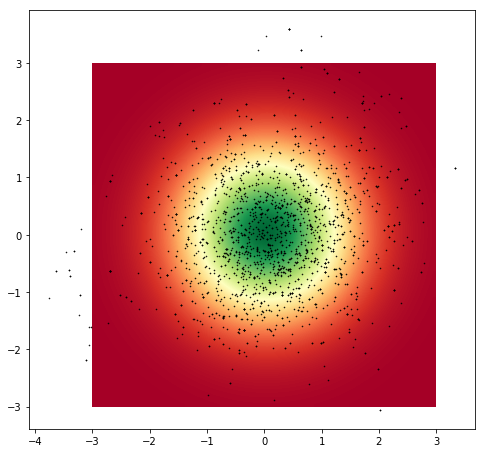

In [61]:
import matplotlib.mlab as mlab
import matplotlib.cm as cm

delta = .1

x = y = np.arange(-3.0, 3.0, delta)
X,Y = meshgrid(x, y)
Z = mlab.bivariate_normal(X, Y, 1., 1., 0., 0.)

plt.figure(figsize=(8,8))

plt.imshow(Z,
           interpolation='bilinear',
           cmap=cm.RdYlGn,
           origin='lower',
           extent=[-3, 3, -3, 3],
           vmax= abs(Z).max(),
           vmin=abs(Z).min())

alpha = 1

T1 = Hastings(2000, np.array((2, 1)), alpha)
plt.scatter(T1[:,0], T1[:,1], s=0.3, c='black')


# Convergence en loi de la chaine

In [66]:
ptinit = np.array((2, 2))
M = 500

nsimu = 200

X1 = np.zeros(nsimu)
X2 = np.zeros(nsimu)
X3 = np.zeros(nsimu)

for i in range(0,nsimu):
    T1 =Hastings(M, ptinit, .1)
    X1[i] = T1[M,1]
    T1 =Hastings(M, ptinit, 1)
    X2[i] = T1[M,1]
    T1 =Hastings(M, ptinit, 20)
    X3[i] = T1[M,1]
    
    
    
    

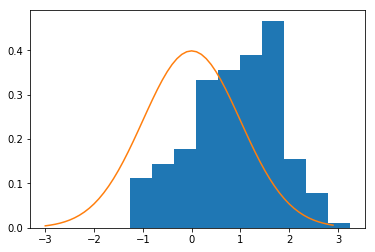

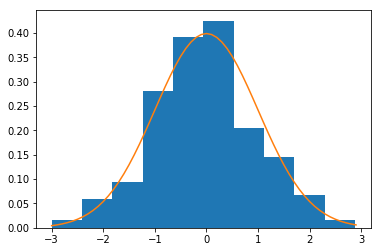

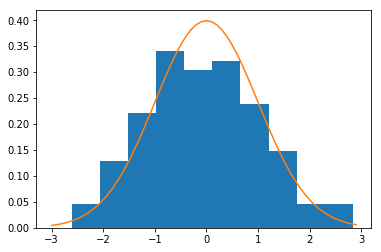

In [67]:
plt.hist(X1, normed=True)
X = np.linspace(-5, 5, 2000)
plt.plot(x, norm.pdf(x))
plt.show()

plt.hist(X2, normed=True)
X = np.linspace(-5, 5, 2000)
plt.plot(x, norm.pdf(x))
plt.show()

plt.hist(X3, normed=True)
X = np.linspace(-5, 5, 2000)
plt.plot(x, norm.pdf(x));

En partant de (2,2), les petits alpha ne peuvent pas donner une convergence en loi la plus rapide.

Les grands alpha ne sont pas mauvais pour la convergence en loi.

En fait, pour la convergence en loi, on ne regarde pas le long de la marche.
et donc ce n'est pas surprenant

# Ergodicité

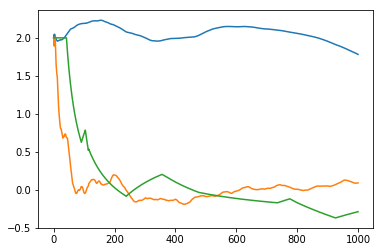

In [72]:
M = 1000

ptinit = np.array((1, 2))

T1 =Hastings(M, ptinit, .1)
T2 =Hastings(M, ptinit, 1)
T3 =Hastings(M, ptinit, 20)

plt.plot(np.cumsum(T1[:,1]) / (1 + np.arange(M + 1)), label='a')
plt.plot(np.cumsum(T2[:,1]) / (1 + np.arange(M + 1)), label='a')
plt.plot(np.cumsum(T3[:,1]) / (1 + np.arange(M + 1)), label='a')

convergence la plus rapide auttour de  l'aplha = 1

L'ergodicite les plus grand alpha ralentissent la convergence

On voit sur la courbe bleu les zones ou la courbe a été ralentie allure 1/x

Dans cet exo la condition du sup(f) n'as pas été vérifié